**Kız Başına Veri Analizi Bootcamp 1. Bitirme Projesi**


In [5]:
from google.colab import files
uploaded = files.upload()

Saving customer_experience_data.csv to customer_experience_data.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



**1. Veri Seti Seçimi**

* Bu veri setini seçmemin sebebi, içinde birçok farklı bilgi bulunmasıydı. Müşterilerin yaşı, alışveriş sayısı, siteye ne kadar zaman harcadığı gibi bilgiler vardı ve bunlar bana daha anlamlı geldi. Hem sayısal hem de kategorik veriler olduğu için farklı grafikler ve analizler deneme şansım oldu.

* Ayrıca veri seti düzenliydi, eksik veri yoktu, bu da çalışmamı kolaylaştırdı. İlk kez böyle bir analiz yaptığım için bu veri setiyle başlamak bana daha uygun geldi.

In [6]:
df = pd.read_csv("customer_experience_data.csv")
df.head(1500)

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,Female,Rural,12,4,5,37,11.853828,8,Churned,0,0,0
996,997,64,Male,Rural,5,4,11,5,25.124461,5,Retained,1,0,1
997,998,62,Female,Rural,6,1,5,28,17.616643,2,Retained,0,0,1
998,999,35,Male,Rural,11,5,4,8,17.006671,9,Retained,1,0,1


**2. İstatistiksel Özet**


In [ ]:
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


| Değişken                  | Ortalama (Mean) | Medyan (50%) | Min – Max    | Standart Sapma (Std) |
| ------------------------- | --------------- | ------------ | ------------ | -------------------- |
| **Age**                   | 43.82           | 44           | 18 – 69      | 14.99                |
| **Num\_Interactions**     | 7.55            | 8            | 1 – 14       | 4.02                 |
| **Feedback\_Score**       | 2.99            | 3            | 1 – 5        | 1.42                 |
| **Products\_Purchased**   | 10.42           | 11           | 1 – 19       | 5.35                 |
| **Products\_Viewed**      | 27.37           | 27.5         | 5 – 49       | 12.94                |
| **Time\_Spent\_on\_Site** | 32.27           | 32.46        | 5.11 – 59.95 | 15.73                |
| **Satisfaction\_Score**   | 5.54            | 6            | 1 – 10       | 2.90                 |

* Veri setine baktığımızda, müşterilerin yaş ortalamasının yaklaşık 43.8 olduğunu
görüyoruz. En genç müşteri 18, en yaşlı müşteri ise 69 yaşındaymış. Bu da bize müşteri kitlesinin oldukça geniş bir yaş aralığında olduğunu gösteriyor.

* Müşterilerle olan etkileşim sayısının ortalaması 7.5 civarında. En fazla 14 kez etkileşim kurulmuş. Bu sayılar müşteriyle düzenli bir iletişim olduğunu düşündürüyor.

* Feedback_Score (geri bildirim skoru) ortalama olarak 3 çıkmış. Skor aralığı 1 ile 5 arasında olduğu için bu ortalamanın çok da kötü olmadığını söyleyebilirim. Geri bildirimlerin genel olarak orta düzeyde olduğunu anlıyoruz.

* Products_Purchased ile Products_Viewed karşılaştırıldığında, bazı müşterilerin birçok ürünü incelemesine rağmen daha az satın alma yaptığı anlaşılıyor. Bu durum, bazı kullanıcıların sadece ürünleri incelediğini ama satın almaya yönelmediğini düşündürebilir.

* Time_Spent_on_Site yani müşterinin sitede geçirdiği sürenin ortalaması 32 dakika civarında. Bazı müşteriler sitede neredeyse 1 saate yakın (59 dakika) vakit geçirmiş. Standart sapması da oldukça yüksek (15.73), yani bazıları çok az, bazıları ise uzun süre kalmış.

* Son olarak, Satisfaction_Score ortalama 5.54 olarak gözüküyor. Skorlar 1’den 10’a kadar gittiği için bu ortalamanın aslında pek de yüksek olmadığını söyleyebiliriz. Genel olarak memnuniyet seviyesinin orta düzeyde olduğunu düşündürüyor.






**3. Eksik Değer Analizi**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Location,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0


<Axes: >

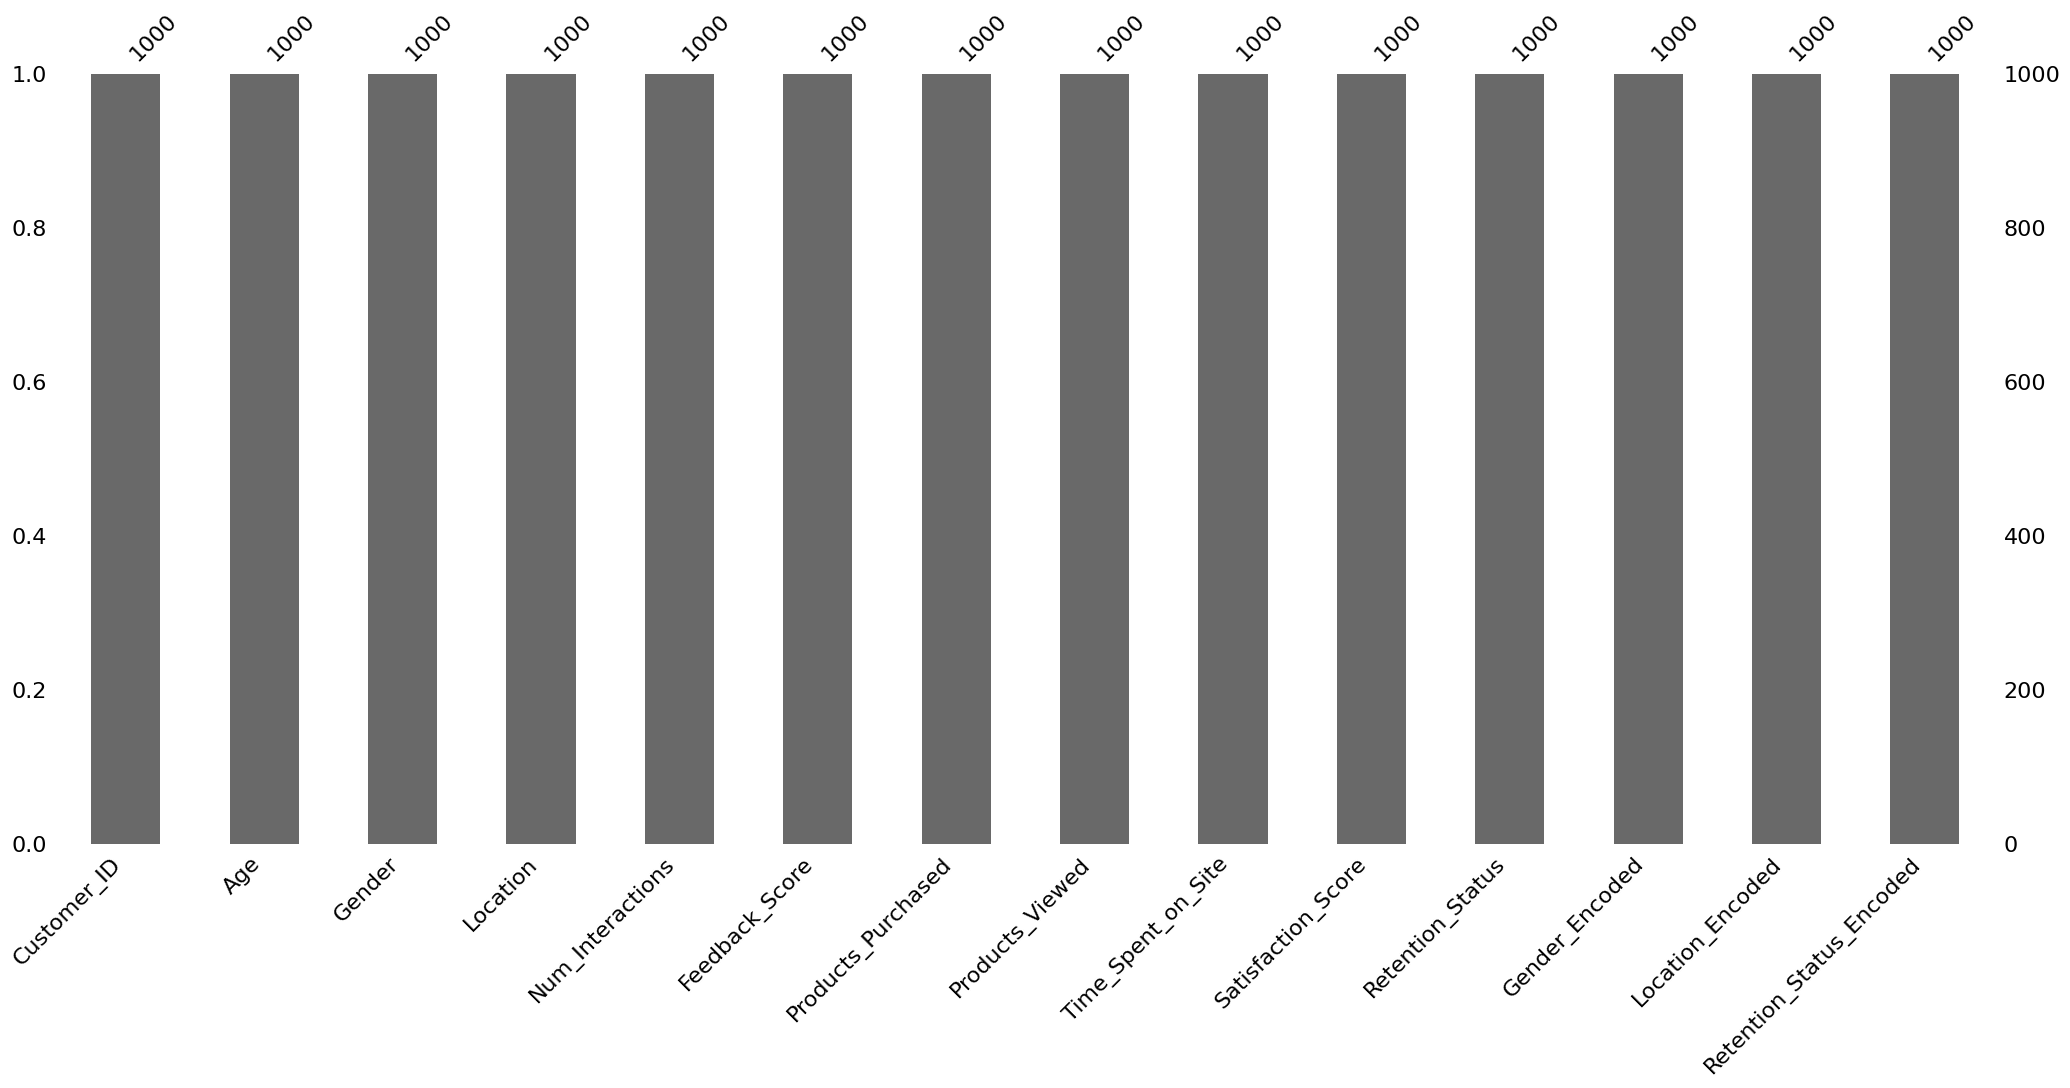

In [7]:
!pip install missingno

import missingno as msno
msno.bar(df)

* Veri setimde eksik veri olup olmadığını daha iyi anlayabilmek için missingno kütüphanesini kullanarak bir çubuk grafik oluşturdum. Her sütun için veri sayısı bu grafikle gösterildi. Tüm sütunların çubukları tamamen doluydu, yani veri kaybı yoktu. Bu da veri setimin eksiksiz olduğunu ve temizlik işlemine ihtiyaç olmadığını gösteriyor.

In [ ]:
df.isnull().values.any()


np.False_

* Veri setinde eksik veri olup olmadığını kontrol ettim. Tüm sütunları tek tek incelediğimde hiçbir eksik (null) değere rastlamadım.

* Bu da demek oluyor ki, veri seti oldukça düzenli ve eksiksiz hazırlanmış. Bu yüzden eksik verileri silmeye ya da doldurmaya gerek kalmadı. Veriyi temizlemekle uğraşmadan analiz kısmına geçebildim.

**4. Aykırı Değer (Outlier) Analizi**

* Aykırı değerleri bulmak için ilk olarak sayısal değişkenleri tek tek inceledim. Bunun için sns.boxplot() kullanarak kutu grafikleri çizdim. Örneğin Satisfaction_Score gibi değişkenlerin grafiklerine baktım. Eğer grafikte kutunun dışında nokta olsaydı, bu o değişkende aykırı değer olduğu anlamına gelecekti. Ama genelde böyle bir duruma rastlamadım.

* Ayrıca bazı değişkenler için histogram grafiği de çizdim. Mesela Age değişkeninin dağılımına bakmak için df['Age'].hist(bins=30) komutunu kullandım. Bu grafik sayesinde yaşlar arasında normalden fazla ya da az değer olup olmadığını görmeye çalıştım.

* Genel olarak baktığımda veri setinde belirgin bir aykırı değer olmadığını söyleyebilirim.

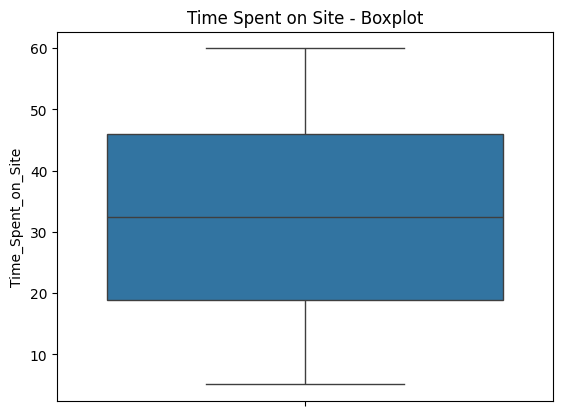

In [ ]:
sns.boxplot(data=df, y='Time_Spent_on_Site')
plt.title('Time Spent on Site - Boxplot')
plt.show()

* Time_Spent_on_Site değişkeni için çizdiğim boxplot grafiğinde herhangi bir aykırı (uç) değere rastlamadım. Değerler kutu sınırları içinde kalıyor, yani veri bu değişkende oldukça düzenli dağılmış.




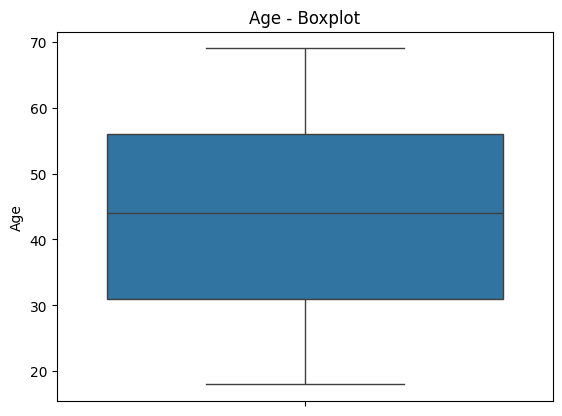

In [ ]:
sns.boxplot(data=df, y='Age')
plt.title('Age - Boxplot')
plt.show()


* Age değişkeni için çizdiğim boxplot grafiğinde herhangi bir aykırı (uç) değere rastlamadım. Değerler kutu sınırları içinde kalıyor, yani veri bu değişkende oldukça düzenli dağılmış.

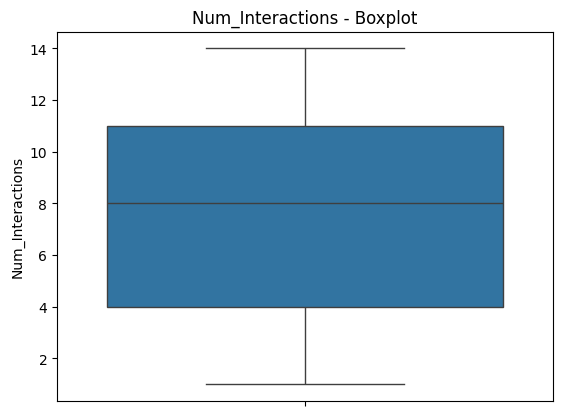

In [ ]:
sns.boxplot(data=df, y='Num_Interactions')
plt.title('Num_Interactions - Boxplot')
plt.show()


* Num_Interactions değişkeni için çizdiğim boxplot grafiğinde herhangi bir aykırı (uç) değere rastlamadım. Değerler kutu sınırları içinde kalıyor, yani veri bu değişkende oldukça düzenli dağılmış.

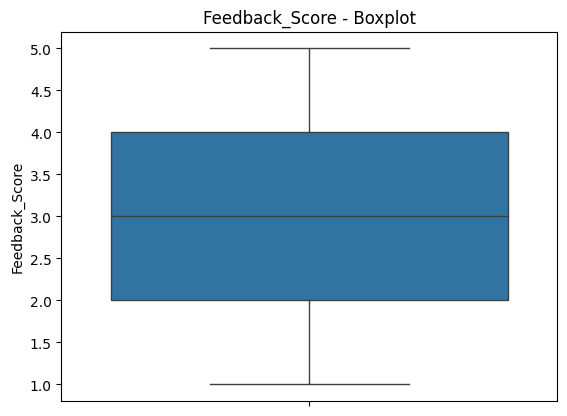

In [ ]:
sns.boxplot(data=df, y='Feedback_Score')
plt.title('Feedback_Score - Boxplot')
plt.show()

* Feedback_Score değişkeni için çizdiğim boxplot grafiğinde herhangi bir aykırı (uç) değere rastlamadım. Değerler kutu sınırları içinde kalıyor, yani veri bu değişkende oldukça düzenli dağılmış.

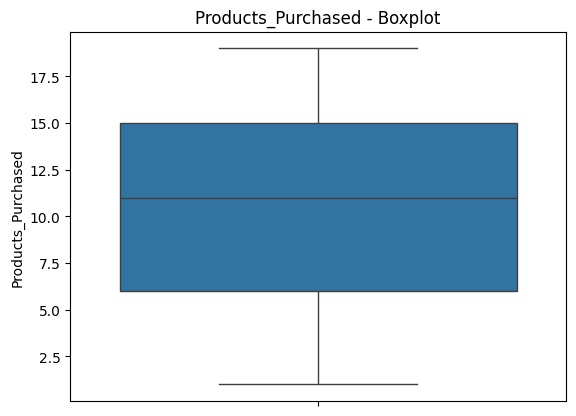

In [ ]:
sns.boxplot(data=df, y='Products_Purchased')
plt.title('Products_Purchased - Boxplot')
plt.show()

* Products_Purchased değişkeni için çizdiğim boxplot grafiğinde herhangi bir aykırı (uç) değere rastlamadım. Değerler kutu sınırları içinde kalıyor, yani veri bu değişkende oldukça düzenli dağılmış.


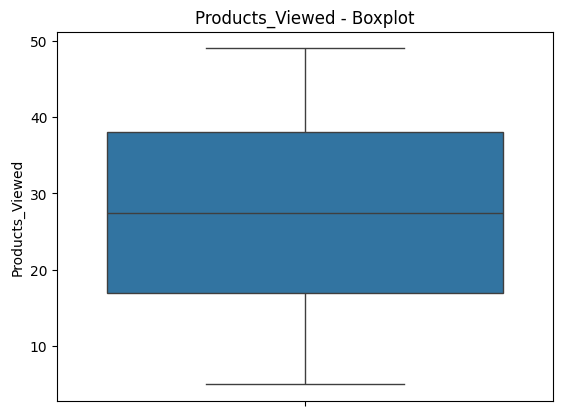

In [ ]:
sns.boxplot(data=df, y='Products_Viewed')
plt.title('Products_Viewed - Boxplot')
plt.show()

* Products_Viewed değişkeni için çizdiğim boxplot grafiğinde herhangi bir aykırı (uç) değere rastlamadım. Değerler kutu sınırları içinde kalıyor, yani veri bu değişkende oldukça düzenli dağılmış.

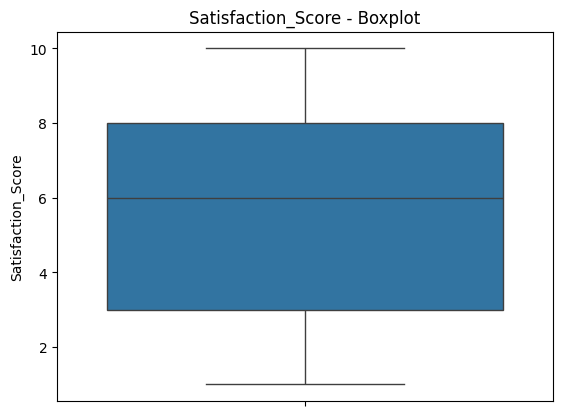

In [ ]:
sns.boxplot(data=df, y='Satisfaction_Score')
plt.title('Satisfaction_Score - Boxplot')
plt.show()


* Satisfaction_Score değişkeni için çizdiğim boxplot grafiğinde herhangi bir aykırı (uç) değere rastlamadım. Değerler kutu sınırları içinde kalıyor, yani veri bu değişkende oldukça düzenli dağılmış.

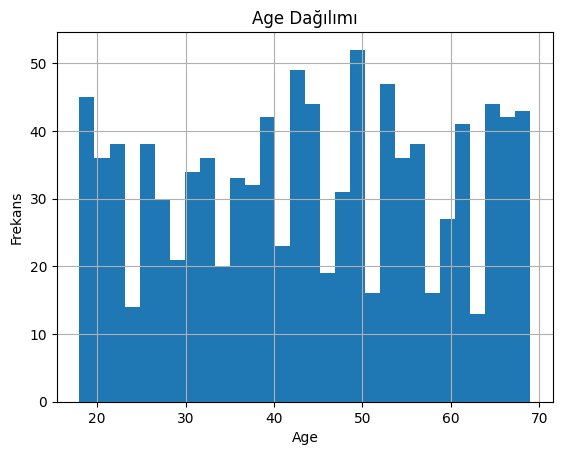

In [ ]:
df['Age'].hist(bins=30)
plt.title('Age Dağılımı')
plt.xlabel('Age')
plt.ylabel('Frekans')
plt.show()

* Age sütununun dağılımını histogram ile inceledim. Grafik, verilerin genel olarak makul ve dengeli bir şekilde dağıldığını gösteriyor. Histogramda aşırı uçlarda yoğunlaşan nadir değerler olmadığı için Age değişkeninde belirgin bir aykırı değer tespit edemedim.



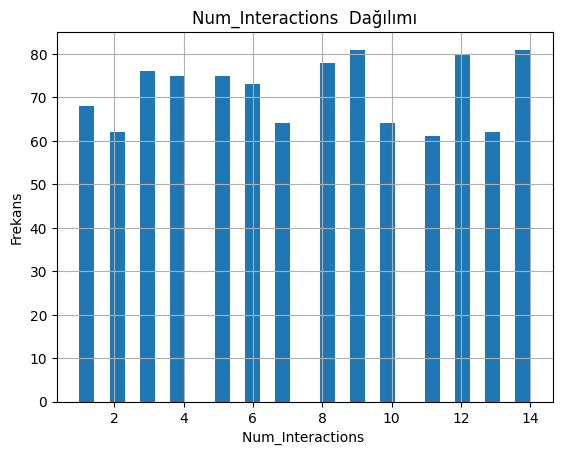

In [ ]:
df['Num_Interactions'].hist(bins=30)
plt.title('Num_Interactions  Dağılımı')
plt.xlabel('Num_Interactions ')
plt.ylabel('Frekans')
plt.show()

* Müşterilerin siteyle etkileşim sayıları değişkenlik gösteriyor ancak aşırı uçlarda yoğunlaşan çok fazla değer yok. Bu yüzden burada da önemli bir aykırı değer tespit edemedim.

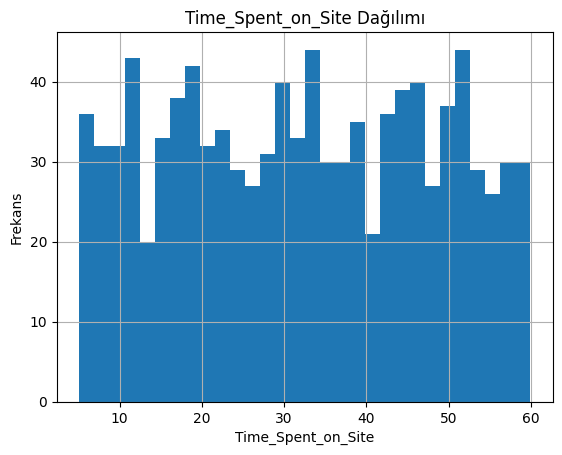

In [ ]:
df['Time_Spent_on_Site'].hist(bins=30)
plt.title('Time_Spent_on_Site Dağılımı')
plt.xlabel('Time_Spent_on_Site')
plt.ylabel('Frekans')
plt.show()

*  Site üzerinde geçirilen süre genel olarak dengeli ve makul aralıklarda dağılmış. Çok kısa ya da çok uzun süreler aykırı değer olarak görünmüyor.

**5. Görselleştirme**


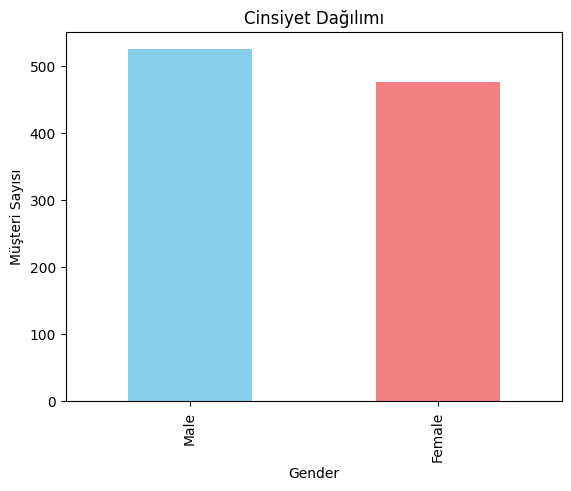

In [9]:
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Gender')
plt.ylabel('Müşteri Sayısı')
plt.show()

* Bu grafikte veri setinde kaç kadın ve kaç erkek müşteri olduğunu göstermek istedim. Bunun için cinsiyet sütunundaki verileri saydırıp çubuk grafikle çizdirdim.

* Renk olarak mavi ve kırmızı tonları kullandım. Grafiğe baktığımda kadın ve erkek sayısının birbirine yakın olduğunu gördüm. Bu da veri setinin dengeli olduğunu gösteriyor.

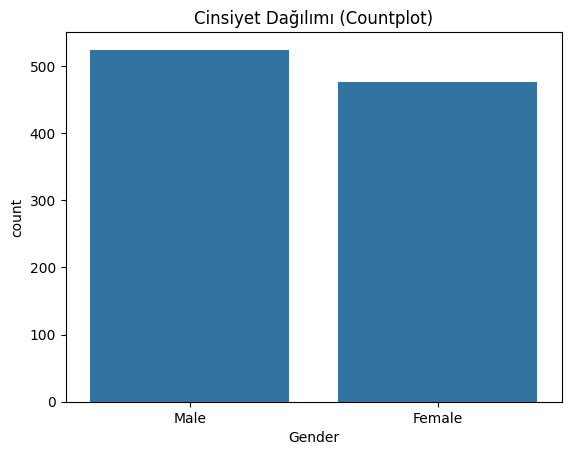

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Cinsiyet Dağılımı (Countplot)')
plt.show()

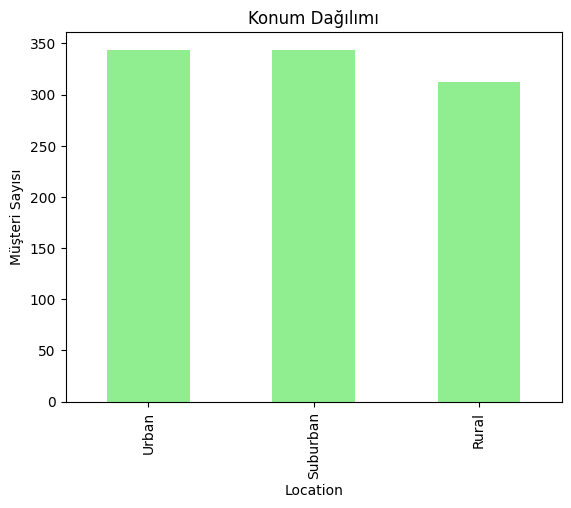

In [ ]:
df['Location'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Konum Dağılımı')
plt.xlabel('Location')
plt.ylabel('Müşteri Sayısı')
plt.show()

* Bu grafikte müşterilerin hangi konumda daha fazla olduğunu görmek istedim. Location sütunundaki verileri saydırıp çubuk grafik çizdirdim.

* Yeşil renkteki çubuklar her konumu temsil ediyor. Grafikten hangi konumda daha çok müşteri olduğunu kolayca görebildim.

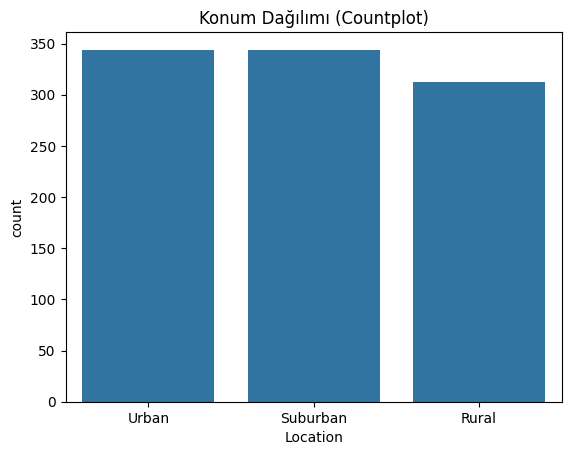

In [ ]:
sns.countplot(x='Location', data=df)
plt.title('Konum Dağılımı (Countplot)')
plt.show()

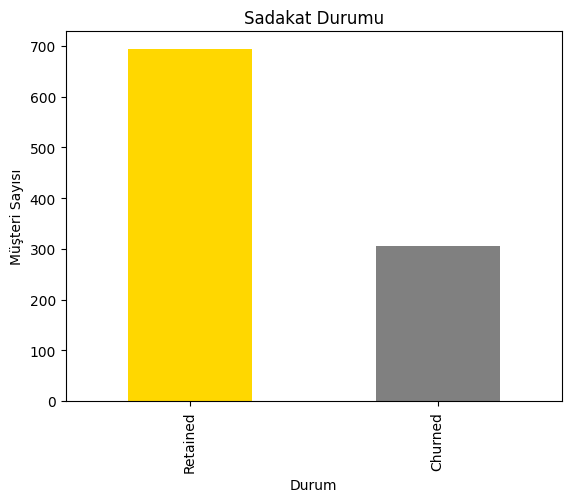

In [ ]:
df['Retention_Status'].value_counts().plot(kind='bar', color=['gold', 'grey'])
plt.title('Sadakat Durumu')
plt.xlabel('Durum')
plt.ylabel('Müşteri Sayısı')
plt.show()

* Bu grafikte müşterilerin sadakat durumunu görmek için Retention_Status sütunundaki verileri saydırdım ve çubuk grafik yaptım.

* Altın ve gri renkli çubuklar, sadık kalan ve ayrılan müşterileri gösteriyor. Grafikten hangi grubun daha fazla olduğunu kolayca anlayabiliyorum.

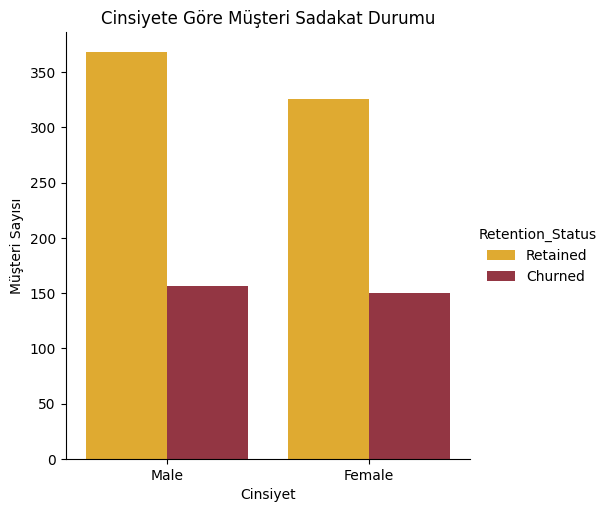

In [ ]:
custom_palette = ["#FCB514", "#A32638"]
sns.set_palette(custom_palette)

sns.catplot(x="Gender", kind="count", hue="Retention_Status", data=df)
plt.title('Cinsiyete Göre Müşteri Sadakat Durumu')
plt.xlabel('Cinsiyet')
plt.ylabel('Müşteri Sayısı')
plt.show()

* Veri setindeki kategorik değişkenler olan Gender, Location ve Retention_Status için grafikler çizdim. Bu grafikler sayesinde hangi gruptan kaç müşteri olduğunu ve müşteri kitlesinin nasıl dağıldığını daha rahat gözlemledim. Görseller, verilerin dengeli dağıldığını ve yorumlamayı kolaylaştırdığını gösterdi.

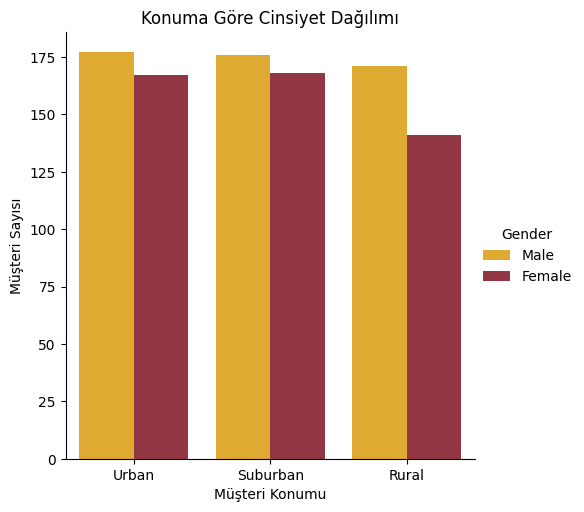

In [ ]:
sns.set_palette(["#FCB514", "#A32638"])  # Sarı - Bordo
sns.catplot(x="Location", kind="count", hue="Gender", data=df)
plt.title('Konuma Göre Cinsiyet Dağılımı')
plt.xlabel('Müşteri Konumu')
plt.ylabel('Müşteri Sayısı')
plt.show()

* Bu grafikte müşterilerin bulundukları konumlara göre sayısını ve her konumdaki cinsiyet dağılımını inceledim. Sarı ve bordo renklerle erkek ve kadın müşterileri ayırdım. Grafikten hangi bölgede hangi cinsiyetin daha fazla olduğunu kolayca görebiliyorum. Böylece konuma göre cinsiyet dağılımı hakkında fikir sahibi oldum

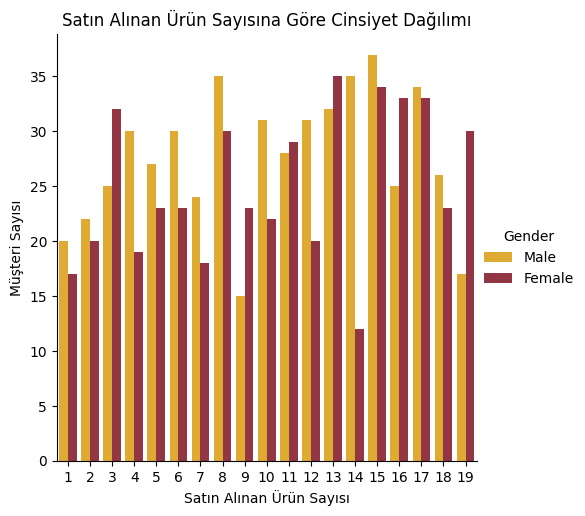

In [ ]:
sns.catplot(x="Products_Purchased", kind="count", hue="Gender", data=df)
plt.title('Satın Alınan Ürün Sayısına Göre Cinsiyet Dağılımı')
plt.xlabel('Satın Alınan Ürün Sayısı')
plt.ylabel('Müşteri Sayısı')
plt.show()

* Bu grafikte müşterilerin satın aldığı ürün sayısına göre cinsiyet dağılımını inceledim. Sarı ve bordo renklerle kadın ve erkek müşterileri ayırdım. Grafikten, hangi cinsiyetin kaç ürün satın aldığını ve ürün sayısına göre müşteri sayısının nasıl değiştiğini kolayca görebiliyorum. Böylece cinsiyet bazında alışveriş alışkanlıklarını anlamaya çalıştım.

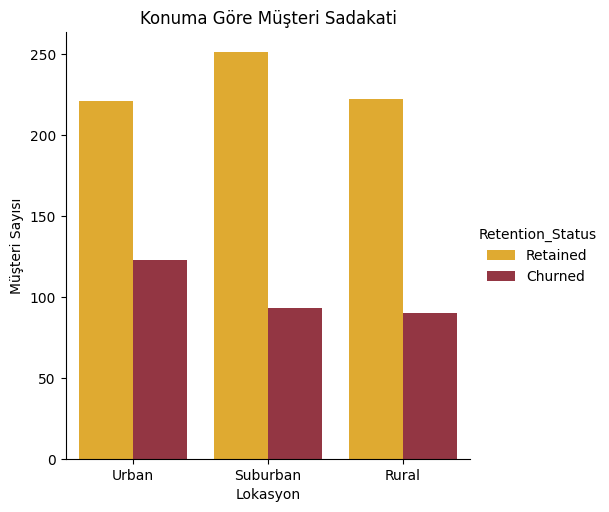

In [ ]:
sns.catplot(x="Location", kind="count", hue="Retention_Status", data=df)
plt.title('Konuma Göre Müşteri Sadakati')
plt.xlabel('Lokasyon')
plt.ylabel('Müşteri Sayısı')
plt.show()


* Bu grafikte müşterilerin konumlarına göre sadakat durumunu inceledim. Yani hangi bölgede kaç müşterinin sadık kaldığını veya ayrıldığını gösteriyor. Renklerle bu durum ayrılmış. Böylece konumlara göre müşteri sadakatinin nasıl dağıldığını daha kolay anlayabiliyorum.

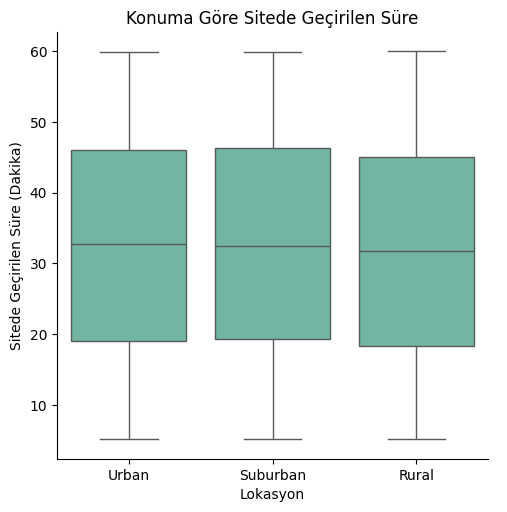

In [ ]:
sns.catplot(x="Location", y="Time_Spent_on_Site", kind="box", data=df)
plt.title('Konuma Göre Sitede Geçirilen Süre')
plt.xlabel('Lokasyon')
plt.ylabel('Sitede Geçirilen Süre (Dakika)')
plt.show()



* Bu grafikte müşterilerin konumlarına göre sitede ne kadar zaman geçirdiklerini kutu grafiği ile gösterdim. Çünkü konum sayısal değil, süre ise sayısal bir veri ve boxplot ile bunların dağılımını kolayca görebiliyorum. Böylece hangi bölgede müşterilerin siteyi daha çok kullandığını anlayabiliyorum.

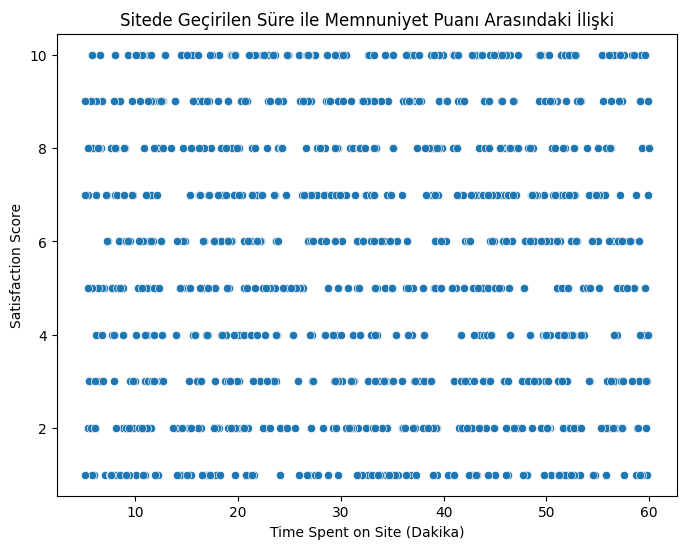

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Time_Spent_on_Site', y='Satisfaction_Score', data=df)
plt.title('Sitede Geçirilen Süre ile Memnuniyet Puanı Arasındaki İlişki')
plt.xlabel('Time Spent on Site (Dakika)')
plt.ylabel('Satisfaction Score')
plt.show()

* Bu grafikte müşterilerin sitede ne kadar zaman geçirdiği ile memnuniyet puanları arasındaki ilişkiyi inceledim. Noktalar, her müşterinin sitede kalma süresiyle memnuniyet skorunu gösteriyor. Ancak grafikte belirgin bir düzen ya da artan bir trend göremedim. Yani, sitede daha uzun kalan müşterilerin daha memnun olduğunu söylemek zor. Bu da demek oluyor ki, müşteri memnuniyetini etkileyen başka şeyler olabilir, sadece sitede geçirilen süre yeterli değil.